In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Read the Excel file
df = pd.read_excel('DATA/Copilot_OSA_DB_UPM.xlsx')

# Create a new column with BMI obtained from Height and Weight
df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2

# Convert Gender into numerical
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Define features and target variable
X = df[['Gender', 'Age', 'BMI', 'Cervical']]
y = df['IAH']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 242.9628992707835


In [3]:
df.head()

,Patient,Gender,Age,Height,Weight,IAH,Cervical,BMI
0,P0002,0,56,174,119,29.6,48.0,39.305060
1,P0004,0,39,168,78,19.7,42.0,27.636054
2,P0005,0,32,173,80,9.0,40.0,26.729927
3,P0006,0,32,190,109,2.0,42.0,30.193906
4,P0007,0,39,169,86,34.0,42.0,30.110991


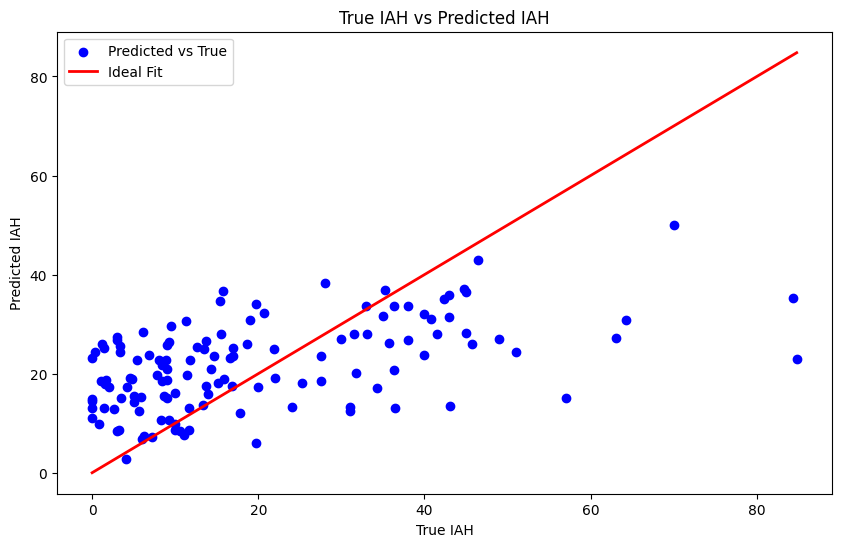

In [2]:
import matplotlib.pyplot as plt

# Plot true IAH vs predicted IAH
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs True')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Ideal Fit')
plt.xlabel('True IAH')
plt.ylabel('Predicted IAH')
plt.title('True IAH vs Predicted IAH')
plt.legend()
plt.show()
